# Final Report: Campus Event Scheduling System

Setups and Imports

In [2]:
import sys
import time
import random
import datetime
import matplotlib.pyplot as plt

sys.path.append('src')

from scheduler.event import Event, EventNode
from scheduler.eventlist import EventList
from scheduler.linkedeventlist import LinkedEventList
from scheduler.sort import SortingAlgorithm, sort_data
from scheduler.search import SearchAlgorithm, search_data

Function to Create Dummy events

In [3]:
"""
This function can generate both sorted and unsorted dummy events
"""

def generate_events(n, sort: bool):
    events_data = []
    start_time = datetime.datetime(2025, 1, 1, 9, 0)
    for i in range(n):
        event_time = start_time + datetime.timedelta(hours=i)
        events_data.append({
            "title": f"Event {i}",
            "date": event_time.strftime("%Y-%m-%d"),
            "time": event_time.strftime("%H:%M"),
            "location": f"Location {i}"
        })
    if not sort:
        random.shuffle(events_data)
    return events_data

Part A: Event Storage Structures

For this project, we have implemented two distinct data structures to manage campus events: array-based list (EventList) that mimics a dynamic array, and a LinkedEventList, which acts as singly linked list.

1. Array-Based List (EventList) Implementation

Our EventList is designed to function like a dynamic array, by using standard Python list with fixed-size to mimic array. Our class maintains two key properties: size - this stores the number of active events in an array, and capacity - this stores the total size of an array. We also have defined a provate _resize() method, which is used to increase the capacity of an array if events were to exceed the capacity.

Complexity Analysis (EventList)

• insert(): The complexity depends on the insertion point. By default, our function is designed to insert at the end, taking O(1) time complexity to insert a new event but since we have conflict detection logic, which checks if two events collide or not, time taken will be O(n) since we are iterating through entire array to check for conflicts. We have also provided an option to insert event at a particular index. So if an event already exist at that particular index, it will perform shift of elements to accomodate the new event, taking O(n) time complexity to insert. Overall, the time taken to perform insertion is O(n). Since the space taken increases linearly everytime new event is inserted, overall space complexity will be O(n). As for auxiliary space taken by single operation, it will also be O(n) since we use slice feature to perform shifting operation, which uses temporary lists, taking O(n) space.

• delete(): Similar to insertion, the complexity varies depending on what needs to be deleted. By default, function will delete event from the end, taking O(1) as time complexity. But we have provided option to delete an event by index or by passing event as an object, both taking O(n) time. For deletion by index, deleting an element by index rakes O(1), but we also need to perform shift of elements to left, which takes O(n), making overall time taken to be O(n). For deletion by event, it will first iterate through list to find exact match, taking O(n), and then perform deletion and shift of elements to left, again taking another O(n), over-all taking O(n) to perform deletion by event. The space taken for deletion of last elemt will be O(1), where as for any other deletion, we are using a temporary list to perform shifting of elements, taking O(n) space.

• search_by_id(): This function will perform searching and return the event if id is found. We provided two options to perform search - Linear Search and Binary Search. If the data is sorted, time taken by Linear is O(n) where as for Binary search, it is O(log n), which is extremely fast and efficient. To put things into perspective, if we have one million event and we need to find last event in array, Linear search will take one million operations to find the id where as Binary will take log (One million) which is equivalent to 20 operations. If the data is not in sorted order, it changes the order. For linear, time taken still remains O(n) where as for Binary, we cannot perform this search without sorting the data in order, which adds additional time taken for sorting, making it inefficient. Assuming we use merge or quick sort, over all time taken to perform Binary search will become O(n log n) which is slower compared to Linear search which takes O(n). The space taken by Linear search on both sorted and unsorted will be O(1) but in case of Binary, sor sorted, it takes O(1) where as for unsorted data, space taken will be O(n) since we using temporary array to store the sorted data.

• list_all(): This function will perform sorting on array and displays events in order of date and time. Here we provide three options, insertion sort, merge sort and quick sort. For insertion sort, time taken to perform sort is $ O(n^2) $, since it use two loop to perform swapping operation. Since we don't use any extra space, the space complexity remains O(1). For merge sort, the time taken is O(n log n), since operation is about splitting array into individual elements and then combine into single one in sorted order. The space taken by merge sort is O(n), since it uses temporary list to store the splitted data. As for quick sort, the time taken is same merge sort, which is O(n log n). The only difference is space taken by quick sort while making standard recursive call will be O(log n). Only downside is that if number of events increase, the depth of recursion will also increase, making it less efficient.

• _resize(): This private function is designed to dynamically increase array size when it's capacity is reached. This function taken in event array, creates a temporary array with new size, copy all the events to new array with new size and return that new array. The time taken for this whole operation is O(n), since most of the times goes into copying elements from one array to another. As for space complexity, since we are using a temporary array, space taken will be O(n).



2. Singly Linked List (LinkedEventList)

Our LinkedEventList is a standard singly linked list structure, where each event is an EventNode that holds the event data and a pointer to the next node in the order. The list itself only maintains a reference to the head (the first node) and its size.

Complexity Analysis (LinkedEventList)

• insert(): This function is designed to insert new element by index. By default, it will insert at the end of the linked list. The time taken to perform an insertion in a linked list depends heavily on the position. To insert a node at the beginning of the list (index 0), the opeartion is extemely fast, taking O(1) time since we only need to update the head pointer. However, inserting at any other position, including at the end, requires us to traverse through the list from the beginning to find the correct spot, which takes O(n) time. Futhermore, we have implemented a conflict detection logic that goes through all existing nodes for every insertion, making the overall time complexity O(n) in all cases. While overall space taken will be O(n), the auxiliary space for single insertion operation will be O(1) as we only adjust pointers to add the new node, without using any temporary lists.

• delete(): This function is designed to delete event either by index or by event. Like insertion, deleting a node also heavily depends on its position. Deleting the first node (head) is an O(1) operation where as to delete a node by its index or by matching the event object, we must first traverse the list to find it. This traversal takes O(n) time, making the over-all time taken to perform deletion O(n). Since we only manipulate pointers to remove the node, no extra space proportional to the list size is needed, so the space taken by this function will be O(1).

• search_by_id(): Like in array based list, this function also perform search to look for id and returns the event if id is found. This function provides option of choosing Linear Search or Binary Search. For Linear Search, it traverse the list from the head until the target ID is found, which takes O(n) time and O(1) space, irrespective of whether data is sorted or unsorted. As for Binary Search, is not a practical algorithm for a standard linked list. It relies on direct access to the middle element of a collection, which takes O(1) time in an array but would require an O(n) traversal in a linked list. So each time we need to find middle element, we will need to traverse the linked list to reach middle element, taking O(n) time. It gets worse if data is not sorted. In this case, we will have to perform sorting, assuming we do merge or quick sort, takes O(n log n), and then performs Binary search, which takes O(n) time, making overall time taken O(n log n). The space taken will be O(1) for sorted data and O(n) for unsorted, since we use temporary linked list to store the sorted data.

• list_all(): Like in array based list, this function will perform sorting on linked list and displays events in order of date and time. Here we provide three options, insertion sort, merge sort and quick sort. For insertion sort, time taken will b $ O(n^2) $ but in case of linked list, since inner loop requires to traverse through list, it makes it perform worse than array. Since we are not using any extra space, the auxiliary space taken by this operation will be O(1). For Merge sort, the time taken is O(n log n), but its slower than array due to creating sub list by copying elements, which takes O(n). The space taken will be O(n), since we use temporary list to store the splitted data. For Quick sort, time taken is same as Merge sort, which is O(n log n). Since we cannot random access on linked list, it performs poorly compared to array. The space taken will be O(log n), which is used by stack during standard recursive call. For function as whole, before displayig, we are copying data of linkedlist to python list after sorting, which takes O(n) space.

Part B: Sorting Events

Generating Random Unsorted Dummy Events

In [34]:
size = [50, 500, 5000, 10000]
datasets = {}

for n in size:
    datasets[n] = generate_events(n, sort = False)

Sorting Array-Based-List


--- Testing size: 50 ---
  Insertion Sort took 0.0002 seconds.
  Merge Sort took 0.0001 seconds.
  Quick Sort took 0.0001 seconds.

--- Testing size: 500 ---
  Insertion Sort took 0.0183 seconds.
  Merge Sort took 0.0010 seconds.
  Quick Sort took 0.0013 seconds.

--- Testing size: 5000 ---
  Insertion Sort took 1.7152 seconds.
  Merge Sort took 0.0130 seconds.
  Quick Sort took 0.0202 seconds.

--- Testing size: 10000 ---
  Insertion Sort took 6.8046 seconds.
  Merge Sort took 0.0268 seconds.
  Quick Sort took 0.0479 seconds.


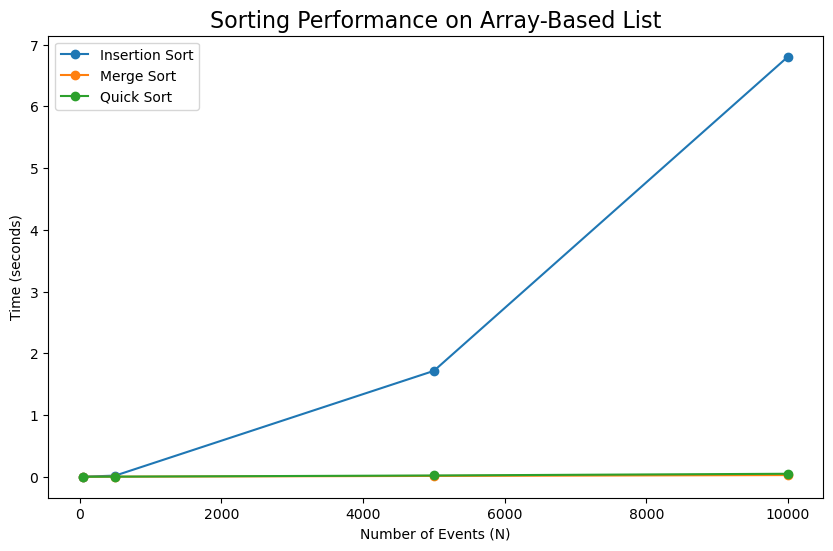

In [35]:
sorts_to_test = {
    "Insertion Sort": SortingAlgorithm.INSERTION,
    "Merge Sort": SortingAlgorithm.MERGE,
    "Quick Sort": SortingAlgorithm.QUICK
}
array_results = {name: [] for name in sorts_to_test.keys()}

for n in size:
    print(f"\n--- Testing size: {n} ---")
    event_data = datasets[n]
    
    for sort_name, sort_algo in sorts_to_test.items():
        event_list = EventList()
        for data in event_data:
            event_list.insert(Event(**data))

        start = time.time()
        try:
            sort_data(event_list, algorithm=sort_algo)
            duration = time.time() - start
            array_results[sort_name].append(duration)
            print(f"  {sort_name} took {duration:.4f} seconds.")
        except Exception as e:
            print(f"  {sort_name} was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for sort_name, timings in array_results.items():
    ax.plot(size, timings, marker='o', label=sort_name)

ax.set_title('Sorting Performance on Array-Based List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.show()

Sorting Linked List


--- Testing size: 50 ---
  Insertion Sort took 0.0072 seconds.
  Merge Sort took 0.0019 seconds.
  Quick Sort took 0.0037 seconds.

--- Testing size: 500 ---
  Insertion Sort took 0.7508 seconds.
  Merge Sort took 0.0209 seconds.
  Quick Sort took 0.0651 seconds.

--- Testing size: 5000 ---
  Insertion Sort took 492.0186 seconds.
  Merge Sort took 0.6410 seconds.
  Quick Sort took 6.5571 seconds.

--- Testing size: 10000 ---
  Insertion Sort took 3289.5070 seconds.
  Merge Sort took 1.9359 seconds.
  Quick Sort took 25.9335 seconds.


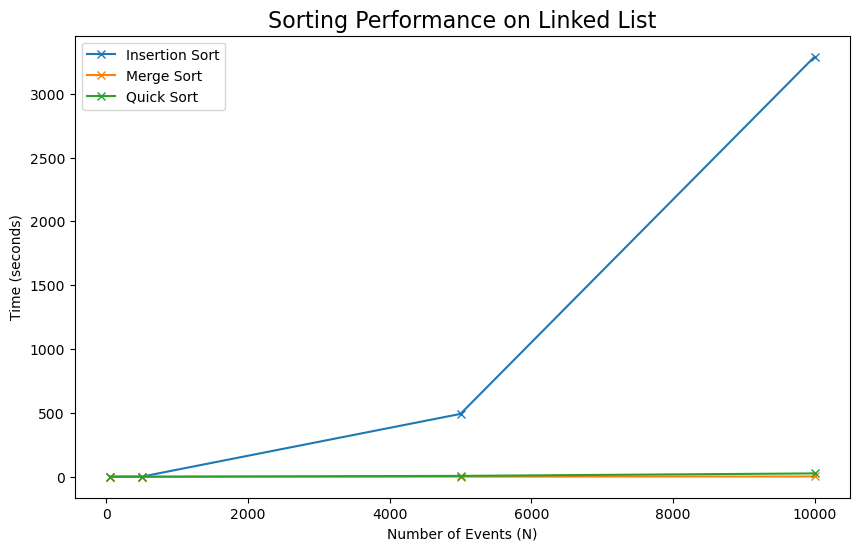

In [36]:
linked_list_results = {name: [] for name in sorts_to_test.keys()}

for n in size:
    print(f"\n--- Testing size: {n} ---")
    event_data = datasets[n]
    
    for sort_name, sort_algo in sorts_to_test.items():
        # Create a new linked list for each test
        linked_list = LinkedEventList()
        for data in event_data:
            linked_list.insert(EventNode(**data))

        start = time.time()
        try:
            sort_data(linked_list, algorithm=sort_algo)
            duration = time.time() - start
            linked_list_results[sort_name].append(duration)
            print(f"  {sort_name} took {duration:.4f} seconds.")
        except Exception as e:
            print(f"  {sort_name} was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for sort_name, timings in linked_list_results.items():
    completed_sizes = size[:len(timings)]
    ax.plot(completed_sizes, timings, marker='x', label=sort_name)

ax.set_title('Sorting Performance on Linked List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.show()

Plotting Performance of Data Structures on Each Sorting Algorithm

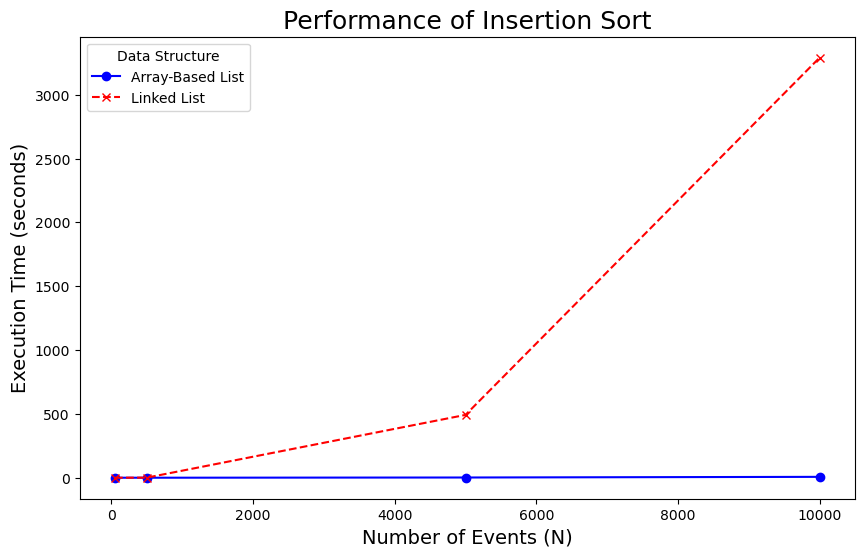

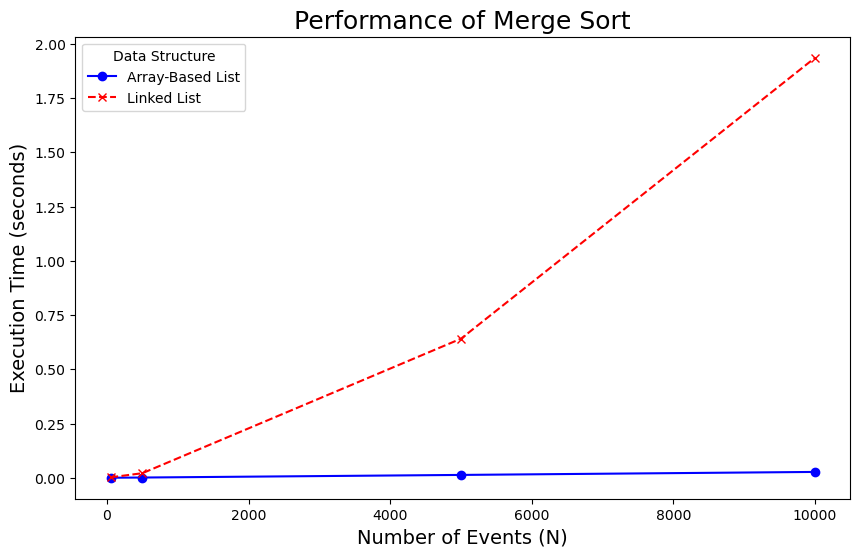

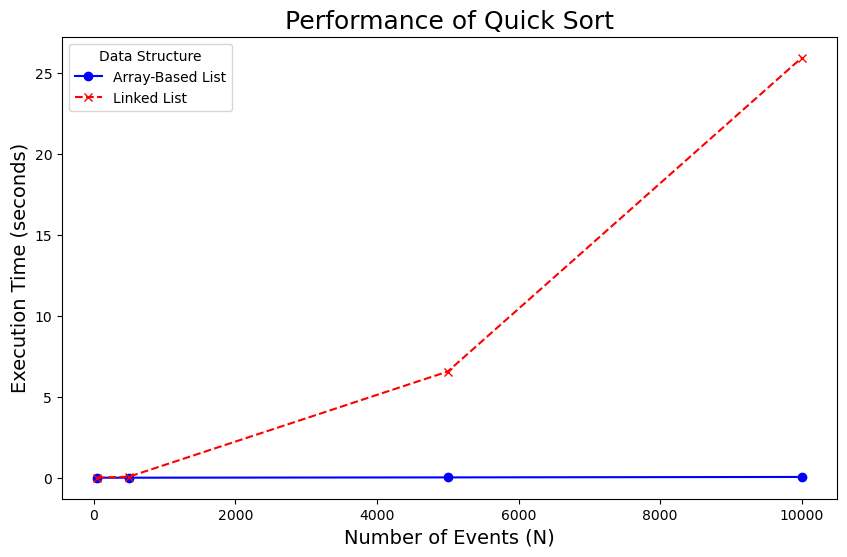

In [37]:
results = {
    "Array List": array_results,
    "Linked List": linked_list_results
}

algorithms_to_plot = ["Insertion Sort", "Merge Sort", "Quick Sort"]

for algo in algorithms_to_plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    array_sizes = [50, 500, 5000, 10000] 
    array_timings = results["Array List"][algo]
    ax.plot(array_sizes, array_timings, 
            label="Array-Based List", 
            marker='o', 
            linestyle='-',
            color='blue')

    linked_list_sizes = [50, 500, 5000, 10000] 
    linked_list_timings = results["Linked List"][algo]
    ax.plot(linked_list_sizes, linked_list_timings, 
            label="Linked List", 
            marker='x', 
            linestyle='--',
            color='red')

    ax.set_title(f"Performance of {algo}", fontsize=18)
    ax.set_xlabel("Number of Events (N)", fontsize=14)
    ax.set_ylabel("Execution Time (seconds)", fontsize=14)
    ax.legend(title="Data Structure")
    
    plt.show()

Part C: Analysis of Searching Algorithm

Generating Sorted Dummy Events

In [ ]:
size = [50, 500, 5000, 50000, 100000]
datasets = {}
target_id = {}

for n in size:
    datasets[n] = generate_events(n, sort = True)
    target_id[n] = n  #Last element will force both to perform worst-case scenario


Searching in Sorted Array-Based-List


--- Testing size: 50 ---
  Linear Search took 0.000017 seconds.
  Binary Search took 0.000009 seconds.

--- Testing size: 500 ---
  Linear Search took 0.000058 seconds.
  Binary Search took 0.000006 seconds.

--- Testing size: 5000 ---
  Linear Search took 0.000608 seconds.
  Binary Search took 0.000008 seconds.

--- Testing size: 50000 ---
  Linear Search took 0.006086 seconds.
  Binary Search took 0.000013 seconds.

--- Testing size: 100000 ---
  Linear Search took 0.016433 seconds.
  Binary Search took 0.000028 seconds.


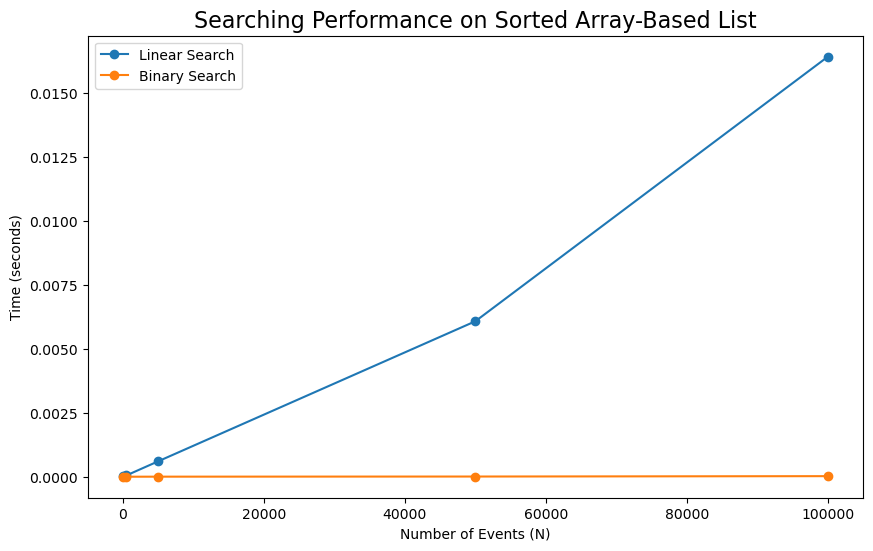

In [31]:
searches_to_test = {
    "Linear Search": SearchAlgorithm.LINEAR,
    "Binary Search": SearchAlgorithm.BINARY
}

array_results = {name: [] for name in searches_to_test.keys()}

for n in size:
    print(f"\n--- Testing size: {n} ---")
    event_data = datasets[n]
    event_list = EventList()
    for i, data in enumerate(event_data):
        event = Event(**data)
        event.id = i+1
        event_list.insert(event)

    for search_name, search_algo in searches_to_test.items():
        start = time.time()
        try:
            search_data(event_list, 
                        target_id[n], 
                        algorithm=search_algo, 
                        attribute = '_id'
            )
            duration = time.time() - start
            array_results[search_name].append(duration)
            print(f"  {search_name} took {duration:.6f} seconds.")
        except Exception as e:
            print(f"  {search_name} was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for search_name, timings in array_results.items():
    ax.plot(size, timings, marker='o', label=search_name)

ax.set_title('Searching Performance on Sorted Array-Based List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.show()

Searching in Sorted Linked List


--- Testing size: 50 ---
  Linear Search took 0.0000 seconds.
  Binary Search took 0.0000 seconds.

--- Testing size: 500 ---
  Linear Search took 0.0001 seconds.
  Binary Search took 0.0001 seconds.

--- Testing size: 5000 ---
  Linear Search took 0.0007 seconds.
  Binary Search took 0.0006 seconds.

--- Testing size: 50000 ---
  Linear Search took 0.0066 seconds.
  Binary Search took 0.0071 seconds.

--- Testing size: 100000 ---
  Linear Search took 0.0123 seconds.
  Binary Search took 0.0154 seconds.


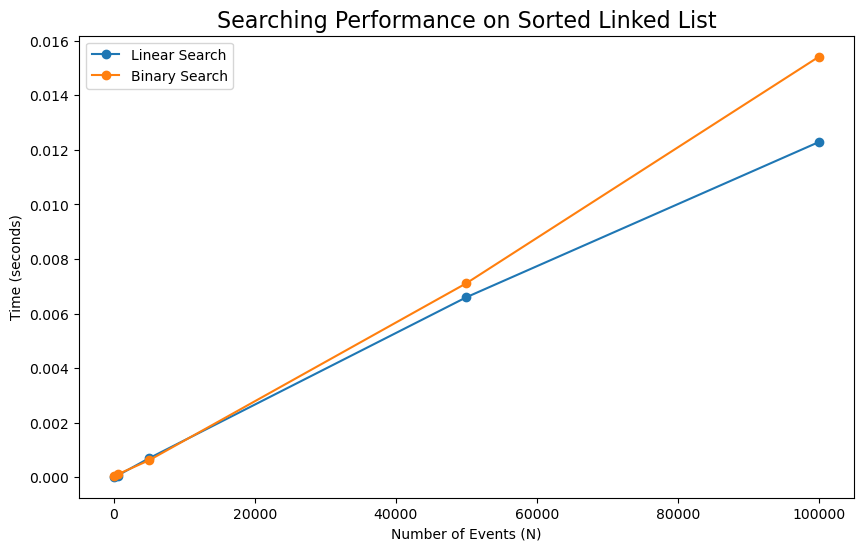

In [32]:
searches_to_test = {
    "Linear Search": SearchAlgorithm.LINEAR,
    "Binary Search": SearchAlgorithm.BINARY
}

linked_list_results = {name: [] for name in searches_to_test.keys()}

for n in size:
    print(f"\n--- Testing size: {n} ---")
    event_data = datasets[n]
    linked_list = LinkedEventList()
    for i, data in enumerate(event_data):
        node = EventNode(**data)
        node.id = i+1
        linked_list.insert(node)

    for search_name, search_algo in searches_to_test.items():
        start = time.time()
        try:
            search_data(linked_list, 
                        target_id[n], 
                        algorithm=search_algo, 
                        attribute = '_id'
            )
            duration = time.time() - start
            linked_list_results[search_name].append(duration)
            print(f"  {search_name} took {duration:.4f} seconds.")
        except Exception as e:
            print(f"  {search_name} was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for search_name, timings in linked_list_results.items():
    ax.plot(size, timings, marker='o', label=search_name)

ax.set_title('Searching Performance on Sorted Linked List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.show()

Performance of Searching Algorithms using Sorted Data

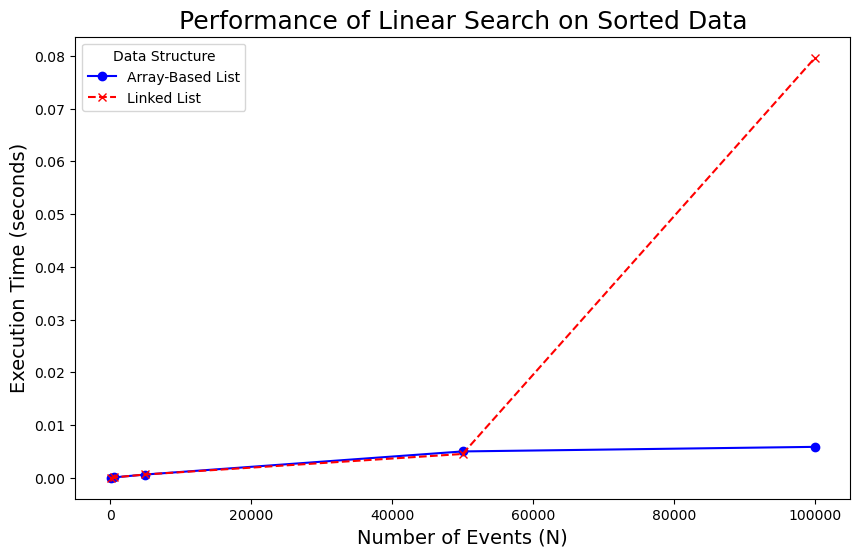

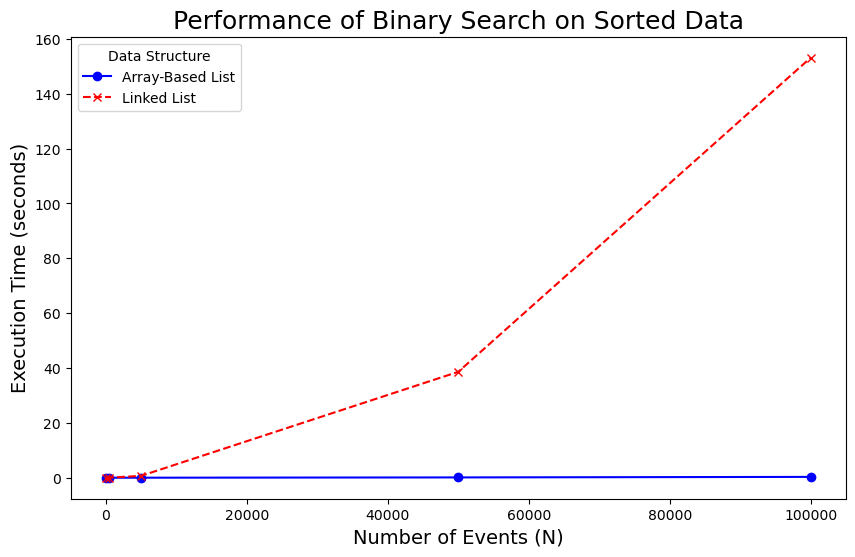

In [41]:
results = {
    "Array List": array_results,
    "Linked List": linked_list_results
}

algorithms_to_plot = ["Linear Search", "Binary Search"]

for algo in algorithms_to_plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    array_sizes = [50, 500, 5000, 50000, 100000] 
    array_timings = results["Array List"][algo]
    ax.plot(array_sizes, array_timings, 
            label="Array-Based List", 
            marker='o', 
            linestyle='-',
            color='blue')

    linked_list_sizes = [50, 500, 5000, 50000, 100000] 
    linked_list_timings = results["Linked List"][algo]
    ax.plot(linked_list_sizes, linked_list_timings, 
            label="Linked List", 
            marker='x', 
            linestyle='--',
            color='red')

    ax.set_title(f"Performance of {algo} on Sorted Data", fontsize=18)
    ax.set_xlabel("Number of Events (N)", fontsize=14)
    ax.set_ylabel("Execution Time (seconds)", fontsize=14)
    ax.legend(title="Data Structure")
    
    plt.show()

Generating Unsorted Dummy Events

In [42]:
"""
Since we need to sort the data before executing binary search, running
test for size more than 5000 will take a lot of time to finish executing
"""
size = [50, 500, 5000, 50000, 100000]
datasets = {}
target_id = {}

for n in size:
    datasets[n] = generate_events(n, sort = True)
    target_id[n] = random.randint(1,n)

Searching in Unsorted Array-Based-List


--- Testing size: 50 ---
  Linear Search took 0.000037 seconds.
  Binary Search took 0.000104 seconds.

--- Testing size: 500 ---
  Linear Search took 0.000071 seconds.
  Binary Search took 0.000872 seconds.

--- Testing size: 5000 ---
  Linear Search took 0.001006 seconds.
  Binary Search took 0.008723 seconds.

--- Testing size: 50000 ---
  Linear Search took 0.005332 seconds.
  Binary Search took 0.108947 seconds.

--- Testing size: 100000 ---
  Linear Search took 0.002620 seconds.
  Binary Search took 0.244225 seconds.


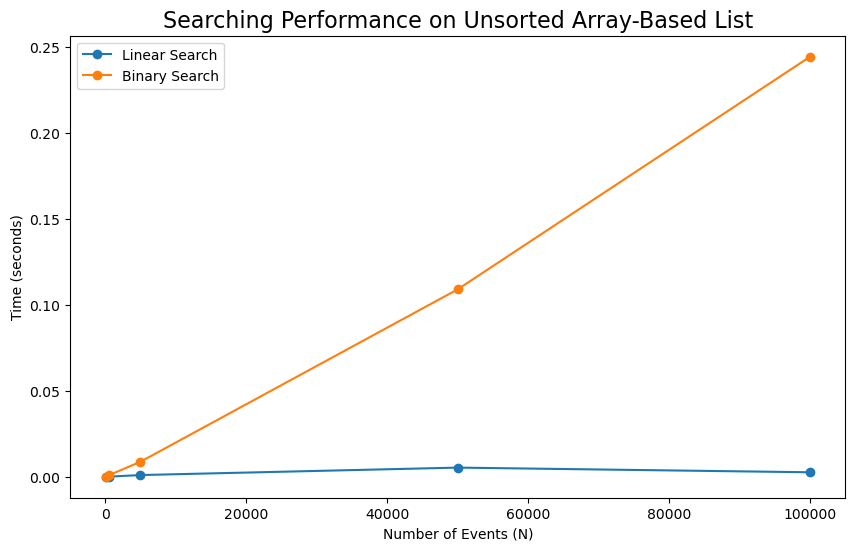

In [43]:
searches_to_test = {
    "Linear Search": SearchAlgorithm.LINEAR,
    "Binary Search": SearchAlgorithm.BINARY
}

array_results = {name: [] for name in searches_to_test.keys()}

for n in size:
    print(f"\n--- Testing size: {n} ---")
    event_data = datasets[n]
    event_list = EventList()
    for i, data in enumerate(event_data):
        event = Event(**data)
        event.id = i+1
        event_list.insert(event)

    for search_name, search_algo in searches_to_test.items():
        start = time.time()
        if search_algo == SearchAlgorithm.BINARY:
            event_list = sort_data(event_list, 
                                   algorithm = SortingAlgorithm.MERGE, 
                                   attribute = "_id"
            )
        try:
            search_data(event_list, 
                        target_id[n], 
                        algorithm=search_algo, 
                        attribute = '_id'
            )
            duration = time.time() - start
            array_results[search_name].append(duration)
            print(f"  {search_name} took {duration:.6f} seconds.")
        except Exception as e:
            print(f"  {search_name} failed or was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for search_name, timings in array_results.items():
    ax.plot(size, timings, marker='o', label=search_name)

ax.set_title('Searching Performance on Unsorted Array-Based List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.show()

Searching in Unsorted Linked-List


--- Testing size: 50 ---
  Linear Search took 0.000026 seconds.
  Binary Search took 0.002571 seconds.

--- Testing size: 500 ---
  Linear Search took 0.000071 seconds.
  Binary Search took 0.026673 seconds.

--- Testing size: 5000 ---
  Linear Search took 0.000643 seconds.
  Binary Search took 0.670112 seconds.

--- Testing size: 50000 ---
  Linear Search took 0.004530 seconds.
  Binary Search took 38.598236 seconds.

--- Testing size: 100000 ---
  Linear Search took 0.079637 seconds.
  Binary Search took 153.107013 seconds.


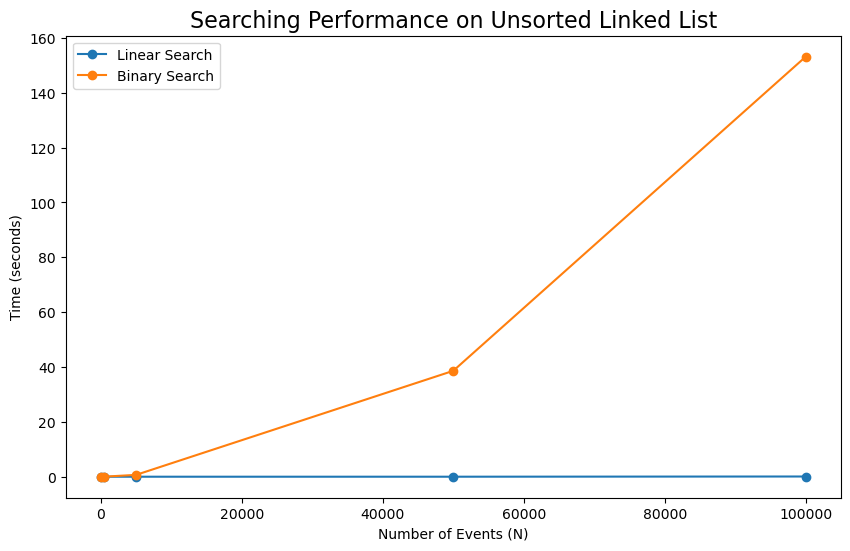

In [40]:
searches_to_test = {
    "Linear Search": SearchAlgorithm.LINEAR,
    "Binary Search": SearchAlgorithm.BINARY
}

linked_list_results = {name: [] for name in searches_to_test.keys()}

for n in size:
    print(f"\n--- Testing size: {n} ---")
    event_data = datasets[n]
    linked_list = LinkedEventList()
    for i, data in enumerate(event_data):
        node = EventNode(**data)
        node.id = i+1
        linked_list.insert(node)

    for search_name, search_algo in searches_to_test.items():
        start = time.time()
        if search_algo == SearchAlgorithm.BINARY:
            linked_list = sort_data(linked_list, 
                                    algorithm = SortingAlgorithm.MERGE, 
                                    attribute = "_id"
            )
        try:
            search_data(linked_list, 
                        target_id[n], 
                        algorithm=search_algo, 
                        attribute = '_id'
            )
            duration = time.time() - start
            linked_list_results[search_name].append(duration)
            print(f"  {search_name} took {duration:.6f} seconds.")
        except Exception as e:
            print(f"  {search_name} failed or was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for search_name, timings in linked_list_results.items():
    ax.plot(size, timings, marker='o', label=search_name)

ax.set_title('Searching Performance on Unsorted Linked List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.show()

Plotting Performance of Data Structures on Each Search Algorithm

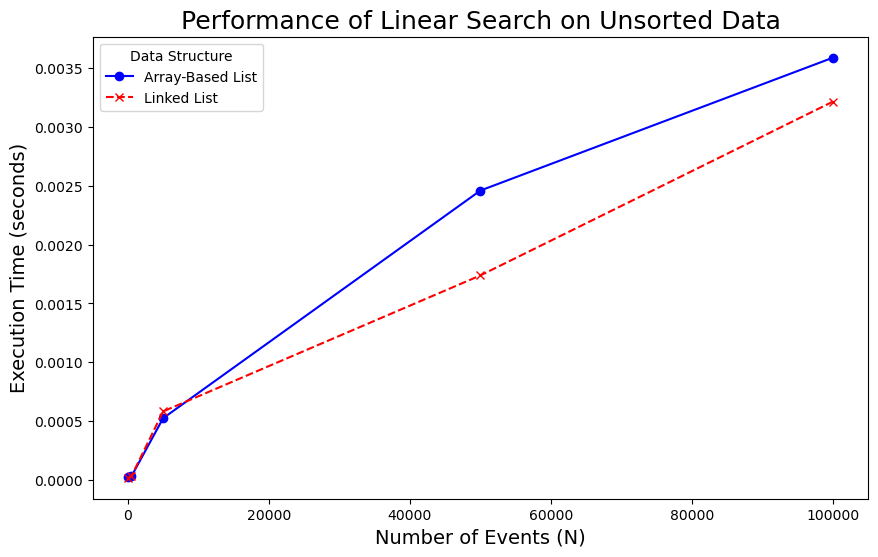

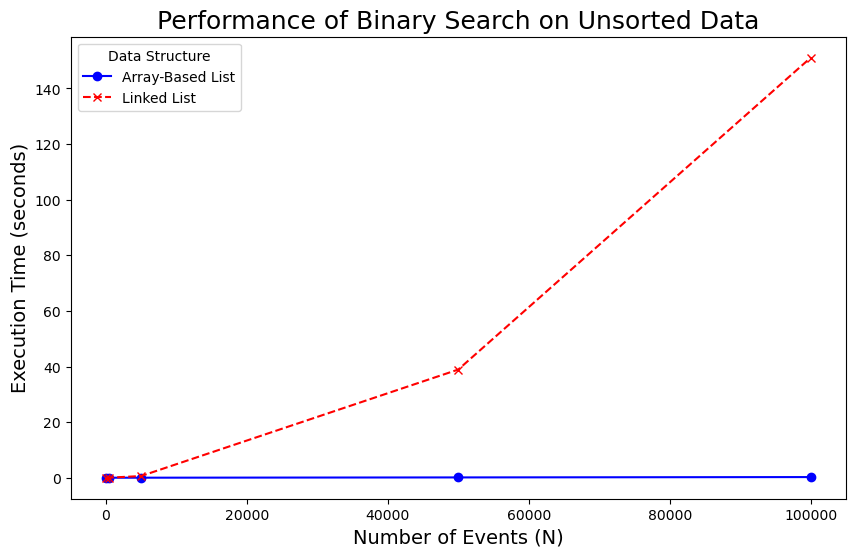

In [29]:
results = {
    "Array List": array_results,
    "Linked List": linked_list_results
}

algorithms_to_plot = ["Linear Search", "Binary Search"]

for algo in algorithms_to_plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    array_sizes = [50, 500, 5000, 50000, 100000] 
    array_timings = results["Array List"][algo]
    ax.plot(array_sizes, array_timings, 
            label="Array-Based List", 
            marker='o', 
            linestyle='-',
            color='blue')

    linked_list_sizes = [50, 500, 5000, 50000, 100000] 
    linked_list_timings = results["Linked List"][algo]
    ax.plot(linked_list_sizes, linked_list_timings, 
            label="Linked List", 
            marker='x', 
            linestyle='--',
            color='red')

    ax.set_title(f"Performance of {algo} on Unsorted Data", fontsize=18)
    ax.set_xlabel("Number of Events (N)", fontsize=14)
    ax.set_ylabel("Execution Time (seconds)", fontsize=14)
    ax.legend(title="Data Structure")
    
    plt.show()

Part D: Scalability Challenge

1. Estimate memory usage for array vs linked list

When scaling to One million events, the memory taken by data structures becomes critical. The main difference between array and linked list is that linked list has overhead pointer which requries extra storage.

Let's estimate the memory usage of both data structures. For parent class Event, it's attributes (strings, integers, and datetime objects) contribute to roughly 150 bytes, so each event object will take 150 bytes of storage.

For array, the total storage it takes is 1 million events x 150 bytes which gives us total size of 150,000,000 bytes. One million bytes is roughly equals to 1 MB, therefore total storage taken by array for One million is 150 MB. 

For linked list, in addition to the space taken by event object, each object has a pointer which points to next object. Each of these pointer take roughly 8 byte in a modern 64 bit system. This takes total size taken by each event in linked list to 150 bytes + 8 bytes, which is equal to 158 bytes. For One million events, this is estimated to 158 MB.

For One million events, comparing to array, the linked list takes 8 MB more than array which is not relevant in modern systems. While not a huge difference, this shows that for raw data storage, the array is proven to be more memory-efficient that linked list.

2. Suggest optimizations (e.g., indexing, hybrid structures).

To handle One million events, we can make lot of optimizations to improve the performance.

• Improve array Resizing Strategy: Currently, our resize function increases size by 10 spaces. That means every 10th event, we call resize function, which takes O(n) time to perform the opertaion. We can avoid this by doubling size every time capacity is attained. This way, number of times resize will be called will be log (n), which drastically reduce cost of performing resize. Only downside is that, if we have One million events and its full, to insert next new event will increase size of array to two million, leading to one million empty spaces. This reduce auxiliary space taken from O(n) to O(1).

• Implementing In-place operation for Array: Currently, our insert and delete function of array uses temporary python list to store the data while performing operation by index. For one million events, these temporary list will create significant memory pressure. To avoid this, we can using for loop to manually shift all elements left or right depending on the operation we perform.

• Implementing Hybrid Data Structure: We can combine both array based list and linked list to create a hybrid structure. For example, we can create array of 100 events separately, and each of these array is linked to next array like node linking to another node in linked list. This will help us reduce the space taken by pointers from every having pointer for each element to having pointer to every 100th element. It also makes access element inside an array node faser because they are stored next to each other in memory.

• Improving conflict detection: Currently, our logic traverse through entire list to find if there are any conflicts, taking O(n). If we can maintain list sorted by date and time, we can use Binary search to find the spot in O(log n) time. Once we find time, we only need to check the neighbor events, taking O(1) time. This will reduce the overall time taken from O(n) to O(log n), which is extremely fast when scaled to One million events.

• Adding tail pointer to Linked List: Currently, if we need to perform any operation in second half of the linked list, we will still need to traverse from head, taking O(n). But if we maintain a tail pointer, We can access second half of list faster by travering from tail towards head reducing overall time taken to perform the operations. This improved execution time becomes signifant when scaled to One million events.

3. Sketch a design for parallel conflict detection (multi-core idea)

Our current implementation is designed to maintain a strictly conflict-free schedule. At the time of insertion, the insert method actively checks whether new event conflict with any existing ones. If any overlap in date and time is found, the insertion is rejected entirely.

While effective for preventing basic conflicting events error, this approach has a significant limitation. It assumes that no two events can ever occur at the same time slot. This design prevents scenarios like where multiple distinct activities are intentionally scheduled to run concurrently in the same large venue. A more robust system, therefore, requires a tool that can analyze all conflicts within a dataset, rather than only preventing them one by one at the point of entry.

To address this, we propose a design for a parallel conflict detection system using operations like Filter, Sort, and Divide-and-Conquer strategies. This system would efficiently find all conflicts on a given date, especially when adding a new batch of events. 

The process begins by filtering the main event list to create a temporary list of all events which are already scheduled on a given date and then merging the new batch of events into it. This combined list which contains every event that could possibly conflict, is then sorted by start time of the event. This sorting step is the key to the algorithm's efficiency, as it groups potentially conflicting events next to each other.

With a single, sorted list of relevant events, we can then take advantage of multi-core processing by dividing the workload across a multi-core CPUs. For example, we can divide the event list of One million events to 4 batch containing 250,000 events and perform operations on each batch simultaneously by taking advantage of multi-core processing. Here, each core will simultaneously executes a fast "sweep" algorithm, iterating through its respective batch of events just once to find internal conflicts by checking if an event overlaps with its immediate neighbor. The conflict lists from all four cores are then merged into a single, comprehensive list, providing a complete analysis in a fraction of the time compared to that of what a single-core approach would take.

Part E: Teamwork

* Stephanie Bie: General prototyping & packaging, git & changelog maintenance, readme writeup, sorting algorithms implementation, unit testing

* Dnyanada Bhosale: Search algorithms implementation, performance analysis

* Augustine Joy: Event classes implementation, performance analysis